# Ejercicios adicionales de programación

Ejercicios adicionales del bloque de Numpy y Pandas.

**Última versión**: 1.0

**Fecha última versión**: 18/11/2023

**Actualización 1.0** 10 ejercicios de Numpy y Pandas. Fecha: 18/11/2023

**IMPORTANTE**: No es válido añadir más imports de los que os damos en la siguiente celda. Esto es así ya que queremos que penséis como programar, no que utilicéis una librería específica que resuelva el problema.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Ejercicio 1

Define una función que, dado un rango de valores `[a, b]` y una función `f(x)`, dibuje la función en una figura de matplotlib.

La cabecera de la función debe ser la siguiente: `pinta_funcion(a, b, f)`

In [2]:
def f(x):
    return x**3

def pinta_funcion(a, b, f):
    puntos = np.linspace(a, b, 100)
    plt.figure(figsize=(4, 2))
    plt.plot(puntos, f(puntos))
    plt.show()

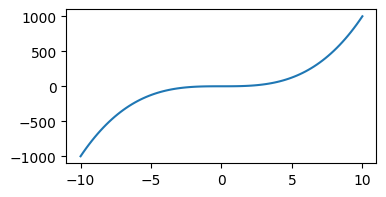

In [3]:
pinta_funcion(-10, 10, f) # Debe pintar la función x^3

Ahora, quiero pintar la función seno en el rango $[0, 2\pi]$.

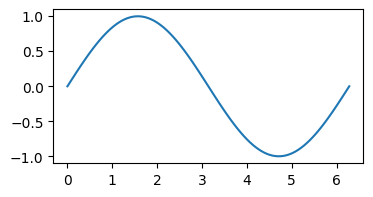

In [4]:
pinta_funcion(0, 2*np.pi, np.sin)

Como habéis visto, podéis dibujar cualquier función matemática $f(x)$, incluidas todas las funciones de numpy.

## Ejercicio 2

Define una función que, dados dos vectores en numpy, calcule la siguiente operación:

$$s = \prod_{i=0}^N v_i + 2q_i$$

donde $v_i$ es la componente i del vector $v$, y $q_i$ es la componente i del vector $q$. Si los vectores no tienen la misma dimensión, la función deberá devolver `None`.

La cabecera de la función debe ser la siguiente: `prod_vectores(v, q)`

In [5]:
# TO-DO Completa la función
def prod_vectores(v, q):
    if v.shape != q.shape:
        return None
    dentro_prod = v + 2*q
    return dentro_prod.prod()

In [6]:
# Celda de test. Añade las que quieras aquí
assert prod_vectores(np.array([2, 3]), np.array([1, 1])) == 20, "Error en el test 1"
assert prod_vectores(np.array([4, 3, -2]), np.array([2, 1, 2])) == 80, "Error en el test 2"
assert prod_vectores(np.array([4, 1]), np.array([1, 2, 3])) is None, "Error en el test 3"

## Ejercicio 3

Define una función que, dada una matriz cuadrada en numpy, calcule la siguiente operación:
    
$$s_{i, j} = m_{i, j} + cos(m_{j, i})$$

donde $m_{i, j}$ es el valor que hay en la fila $i$ y en la columna $j$, y $cos$ es la función coseno. Si la matriz de entrada no es una matriz cuadrada, la función deberá devolver `None`. Redondea cada componente de la matriz a 4 decimales para evitar errores de precisión. Para ello, utiliza la función np.around(m, decimals), que funciona igual que el `round()` que habéis utilizado, pero con numpy.

La cabecera de la función debe ser la siguiente: `operacion(m)`

In [7]:
# TO-DO Completa la función
def operacion(m):
    if m.shape[0] != m.shape[1]:
        return None
    return np.around(m + np.cos(m.T), 4)

In [8]:
# Celda de test. Añade las que quieras aquí
assert (operacion(np.arange(9).reshape(3,3)) == np.array([[1.    , 0.01  , 2.9602],
                                                          [3.5403, 3.3464, 5.7539],
                                                          [5.5839, 7.2837, 7.8545]])).all(), "Error en el test 1"
assert (operacion((np.ones(4)*7+np.arange(4)).reshape(2,2)) == np.array([[7.7539, 7.0889],
                                                                         [8.8545, 9.1609]])).all(), "Error en el test 2"
assert operacion(np.arange(6).reshape(2,3)) is None, "Error en el test 3"

## Ejercicio 4

Dada una matriz, comprueba si se cumple la siguiente condición:

$$AA^{−1}=I$$

Recuerda, una matriz tiene inversa si su determinante es distinto de 0. Por tanto, antes de comprobar nada, si la matriz no tiene inversa, tu función debe devolver `False`. Además, si la matriz no es cuadrada, tampoco tiene inversa.

La cabecera de la función debe ser la siguiente: `check_inversa(A)`

In [9]:
# TO-DO Completa la función
def check_inversa(A):
    if A.shape[0] != A.shape[1]:
        return False
    
    if np.linalg.det(A) == 0:
        return False
    
    return (A @ np.linalg.inv(A) == np.eye(A.shape[0])).all()

In [10]:
# Celda de test. Añade las que quieras aquí
assert check_inversa(np.arange(4).reshape(2,2)) == True, "Error en el test 1"
assert check_inversa(np.array([[2, 2], [4, 4]])) == False, "Error en el test 2"

## Ejercicio 5

Dadas una matriz $M$ con shape $(D, c)$ y un vector $v$ con shape $(c,)$, quiero aplicar la siguiente operación:

$$s_{i, j} = m_{i, j} + v_{j}$$

Este cálculo se puede realizar con un doble bucle anidado como el siguiente:

```
for i in range(D):
  for j in range(c):
    s[i, j] = m[i, j] + v[j]
```

donde, literalmente, estoy aplicando la fórmula en el código. Sin embargo, este doble bucle anidado es muy poco eficiente. Esta operación se puede realizar en una sola línea como una operación matricial de numpy con broadcasting. Define una función que lo calcule utilizando el broadcasting.

La cabecera de la función será la siguiente: `calculo_bueno(M, v)`

In [11]:
def calculo_malo(M, v):
    N = np.zeros_like(M)
    D, c = M.shape
    for i in range(D):
        for j in range(c):
            N[i, j] = M[i, j] + v[j]
    return N

In [12]:
# TO-DO Completa la función
def calculo_bueno(M, v):
    return M + v[None, :]

In [13]:
# Celda de test, puedes añadir lo que quieras
matriz = np.random.randn(10, 5)
v = np.random.randn(5)
assert (calculo_malo(matriz, v) == calculo_bueno(matriz, v)).all(), "Error en el test 1"

## Ejercicio 6

Dados dos vectores $a$ con shape $(c1, )$ y $b$ con shape $(c2, )$, quiero calcular su producto cartesiano, es decir, calcular una matriz $S$ con shape $(c1, c2)$. Puedes aplicar la siguiente ecuación:

$$s_{i,j} = a_i * b_j$$

Este cálculo se puede realizar con un doble bucle anidado como el siguiente:

```
for i in range(c1):
  for j in range(c2):
    s[i, j] = a[i] * b[j]
```

donde, literalmente, estamos aplicando la fórmula en el código. Igual que antes, esto es muy poco eficiente. Define una función `prod_cartesiano(a, b)` que haga la misma operación usando el broadcasting de numpy.

In [14]:
def prod_cartesiano_malo(a, b):
    c1 = a.shape[0]
    c2 = b.shape[0]
    S = np.zeros((c1, c2))
    for i in range(c1):
        for j in range(c2):
            S[i, j] = a[i] * b[j]
    return S

# TO-DO Completa la función
def prod_cartesiano(a, b):
    return a[:, None] * b[None, :]

In [15]:
# Celda de test, podéis añadir lo que queráis
a = np.random.randn(5)
b = np.random.randn(7)
assert (prod_cartesiano_malo(a, b) == prod_cartesiano(a, b)).all() == True, "Error en el test 1"

## Ejercicio 7

Vamos a generar una matriz con shape $(D, c)$ donde `D=1000` y `c=5`, cuyas columnas sigan una distribución Normal con diferentes medias y desviaciones típicas.

Por tanto, si `c=5`, necesitamos realizar este proceso 5 veces. Crea una función que genere `D` puntos aleatorios con media `media` y desviación `std`. La cabecera de la función debe ser `genera_puntos(D, media, std)`.

Cuando tengas esta función, crea otra función, `genera_matriz(D, medias, stds)` que llame a la anterior tantas veces como necesites y concatene las columnas para acabar generando una matriz con shape $(D, c)$.

In [16]:
# TO-DO Completa la función
def genera_puntos(D, media, std):
    return np.random.randn(D) * std + media

# TO-DO Completa la función
def genera_matriz(D, medias, stds):
    c = len(medias)
    M = np.zeros((D, c))
    for i, (media, std) in enumerate(zip(medias, stds)):
        M[:, i] = genera_puntos(D, media, std)
    return M

In [17]:
# Celda de test, añade lo que quieras
D = 1000
medias = np.array([0.1, 0.8, -1.5])
stds = np.array([0.05, 0.01, 0.03])

assert (np.abs(genera_matriz(D, medias, stds).mean(axis=0) - medias) < 1e-2).all(), "Error en el test 1"
assert (np.abs(genera_matriz(D, medias, stds).std(axis=0) - stds) < 1e-2).all(), "Error en el test 2"

Esta opción era la única antes de existir el generador de números aleatorios de la nueva versión de numpy. Sin embargo, ahora tenemos una opción mucho más cómoda con `rng.normal(medias, stds, size)`. Define una función `genera_matriz_con_generator(D, medias, stds)` que use el Generator anterior.

In [18]:
# TO-DO Completa la función
def genera_matriz_con_generator(D, medias, stds):
    rng = np.random.default_rng()
    return rng.normal(loc=medias, scale=stds, size=(D, len(medias)))

In [19]:
# Celda de test, añade lo que quieras
D = 1000
medias = np.array([0.1, 0.8, -1.5])
stds = np.array([0.05, 0.01, 0.03])

assert (np.abs(genera_matriz_con_generator(D, medias, stds).mean(axis=0) - medias) < 1e-2).all(), "Error en el test 3"
assert (np.abs(genera_matriz_con_generator(D, medias, stds).std(axis=0) - stds) < 1e-2).all(), "Error en el test 4"

Ya sea con la función `genera_matriz` o `genera_matriz_con_generator`, genera una matriz $M$ con shape $(D, c)$ con las medias y desviaciones definidas previamente y normaliza las columnas para que sumen 1. Para normalizar por columnas, puedes seguir la siguiente ecuación:

$$\hat{m}_{i,j} = {m_{i, j} \over \sum_{k=0}^cm_{k,j}}$$

Es recomendable seguir esta ecuación en dos pasos, primero puedes calcular el sumatorio del denominador y luego realizar la operación.

La cabecera de la función debe ser la siguiente: `normaliza_sum(M)`

In [36]:
# TO-DO Completa la función
def normaliza_sum(M):
    denominador = M.sum(axis=0) # shape (c,)
    return M / denominador[None, :] # shape (D, c)

In [37]:
# Celda de test, puedes añadir lo que quieras
M = genera_matriz(D, medias, stds)
M = normaliza_sum(M)
assert (np.around(M.sum(axis=0), decimals=6) == 1).all() == True, "Error al normalizar"

## Ejercicio 8

Supongamos que tienes un DataFrame con información de ventas por categoría. Quieres obtener la suma total de ventas por categoría. Define una función `suma_total_ventas(df)` que lo calcule. En la siguiente celda se generan unos datos a mano.

In [90]:
data = {'Categoria': ['A', 'B', 'A', 'B', 'A', 'B'],
        'Ventas': [100, 150, 200, 120, 180, 220]
       }

df = pd.DataFrame(data)
df

,Categoria,Ventas
0,A,100
1,B,150
2,A,200
3,B,120
4,A,180
5,B,220


In [41]:
# TO-DO Completa la función
def suma_total_ventas(df):
    return df.groupby("Categoria").sum()

In [44]:
# Celda de test, añade lo que consideres
ventas_por_categoria = suma_total_ventas(df)
ventas_por_categoria

,Ventas
Categoria,
A,480
B,490


## Ejercicio 9

Tienes datos de ventas por día y quieres calcular la media semanal de las ventas. Define una función `media_semanal(df)` que lo calcule. En la siguiente celda se generan los datos siguiendo una distribución uniforme.

In [94]:
# Primero genera un rango de fechas de 50 dias
rango_fechas = pd.date_range('2023-01-01', periods=50, freq='D')
# Luego generas 50 valores entre 100 y 1000. Fijamos la semilla
np.random.seed(42)
ventas = np.random.randint(100, 1000, size=(50,))
# Creamos el dataframe a partir de un diccionario
data = {'Fecha': rango_fechas, 'Ventas': ventas}
df = pd.DataFrame(data)
df.set_index('Fecha', inplace=True)
df.head()

,Ventas
Fecha,
2023-01-01,202
2023-01-02,535
2023-01-03,960
2023-01-04,370
2023-01-05,206


In [95]:
def media_semanal(df):
    # return df.resample("7D").mean() # esto está mal ya que 7D parte en trozos de 7 días desde que comienzas
    return df.resample("W").mean() # esto es correcto ya que corta cada lunes

In [101]:
# Celda de test, añade aquí lo que quieras
assert (np.around(media_semanal(df).values, decimals=4) == np.array([[202.    ],
                                                                     [451.7143],
                                                                     [427.1429],
                                                                     [543.4286],
                                                                     [585.2857],
                                                                     [418.2857],
                                                                     [616.2857],
                                                                     [722.7143]])).all() == True, "Error en el test 1"

## Ejercicio 10

Busca el valor máximo en un dataframe. Eso significa, encuentra en qué fila y columna se encuentra el valor máximo del dataframe. En la siguiente celda se genera un dataset donde hay que buscar el máximo valor.

La cabecera de la función debe ser la siguiente: `busca_maximo(df)`

In [108]:
rango_fechas = pd.date_range('2023-01-01', periods=100, freq='D')
np.random.seed(14)
df = pd.DataFrame(np.random.rand(100, 5), index=rango_fechas, columns=["A", "B", "C", "D", "E"])
df.head()

,A,B,C,D,E
2023-01-01,0.513943,0.773165,0.870428,0.008047,0.309736
2023-01-02,0.957604,0.513117,0.318284,0.539200,0.221255
2023-01-03,0.806481,0.342255,0.538889,0.005874,0.673152
2023-01-04,0.210024,0.932558,0.374245,0.752419,0.763139
2023-01-05,0.870499,0.110111,0.300092,0.474906,0.672937


In [109]:
# TO-DO Completa la función
def busca_maximo(df):
    valor_maximo = df.values.max()
    return df.iloc[np.where(df.values == valor_maximo)]

In [115]:
busca_maximo(df)

,E
2023-03-17,0.998958


Otra opción es utilizar las funciones `idxmax()` y `max()`, guardando los resultados en dos columnas. Veamos la alternativa:

In [111]:
df2 = pd.DataFrame()
df2["Fecha"] = df.idxmax()
df2["Valor"] = df.max()
df2

,Fecha,Valor
A,2023-01-10,0.998805
B,2023-01-19,0.995050
C,2023-02-28,0.992768
D,2023-03-23,0.996323
E,2023-03-17,0.998958


In [112]:
# Esta segunda opción almacena la misma información pero cambiando la distribución de la información
mask = df2["Valor"] == df2["Valor"].max()
df2[mask]

,Fecha,Valor
E,2023-03-17,0.998958
